In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01.（公開）最終課題/data/Client data.csv')
dfR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01.（公開）最終課題/data/Record data.csv')

最初にデータサイズや型、訓練データの最初の10個のデータを確認します。

In [5]:
print('データのデータ数は{}、変数は{}種類です。'.format(dfC.shape[0], dfC.shape[1]))
print('データのデータ数は{}、変数は{}種類です。'.format(dfR.shape[0], dfR.shape[1]))

データのデータ数は100000、変数は50種類です。
データのデータ数は100000、変数は50種類です。


In [6]:
print(dfC.info())
print(dfR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uniqsubs          100000 non-null  int64  
 1   actvsubs          100000 non-null  int64  
 2   new_cell          100000 non-null  object 
 3   crclscod          100000 non-null  object 
 4   asl_flag          100000 non-null  object 
 5   totcalls          100000 non-null  int64  
 6   totmou            100000 non-null  float64
 7   totrev            100000 non-null  float64
 8   adjrev            100000 non-null  float64
 9   adjmou            100000 non-null  float64
 10  adjqty            100000 non-null  int64  
 11  avgrev            100000 non-null  float64
 12  avgmou            100000 non-null  float64
 13  avgqty            100000 non-null  float64
 14  avg3mou           100000 non-null  int64  
 15  avg3qty           100000 non-null  int64  
 16  avg3rev           100

In [7]:
dfC.head(10)

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,2,2,Y,C,N,26812,40869.00000,4033.98,3932.90,40295.00,...,0.0,U,U,U,U,U,U,Y,458.0,1000006
6,2,2,N,A,N,6279,17390.03333,3091.70,3065.24,17371.03,...,0.0,N,U,U,U,U,U,Y,852.0,1000007
7,1,1,Y,B,N,4491,12492.00000,1427.71,1423.06,12439.00,...,1.0,S,U,U,U,U,U,Y,231.0,1000008
8,1,1,Y,B,N,16730,43231.05333,4404.44,4313.71,42943.05,...,0.0,F,U,U,U,U,U,N,700.0,1000009
9,2,2,N,A,N,391,994.00000,1458.42,1457.84,976.00,...,1.0,N,U,U,U,U,U,Y,601.0,1000010


In [8]:
dfR.head(10)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0,-157.25,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0,532.25,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,-4.25,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0,-1.50,...,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0,38.50,...,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0,156.75,...,0.0,187.760000,0.0,59.666667,702.000000,577.333333,0.0,22.666667,0,59
6,17.1450,0.00,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1,53
7,38.0525,682.50,52.490,0.2475,0.00,0.00,0.00,0.0,0.0,147.50,...,0.0,431.153333,0.0,10.666667,97.000000,73.333333,0.0,0.666667,0,53
8,97.3375,1039.00,50.000,4.9500,419.50,41.95,41.95,0.0,0.0,198.00,...,0.0,297.320000,0.0,15.666667,533.666667,346.666667,0.0,4.000000,0,55
9,31.6625,25.50,29.990,0.2475,0.00,0.00,0.00,0.0,0.0,59.50,...,0.0,1.933333,0.0,1.000000,6.666667,3.333333,0.0,0.000000,0,57


In [9]:
dfC.isnull().sum() 

uniqsubs                0
actvsubs                0
new_cell                0
crclscod                0
asl_flag                0
totcalls                0
totmou                  0
totrev                  0
adjrev                  0
adjmou                  0
adjqty                  0
avgrev                  0
avgmou                  0
avgqty                  0
avg3mou                 0
avg3qty                 0
avg3rev                 0
avg6mou              2839
avg6qty              2839
avg6rev              2839
prizm_social_one     7388
area                   40
dualband                1
refurb_new              1
hnd_price             847
phones                  1
models                  1
hnd_webcap          10189
truck                1732
rv                   1732
ownrent             33706
lor                 30190
dwlltype            31909
marital              1732
adults              23019
infobase            22079
income              25436
numbcars            49366
HHstatin    

In [10]:
dfR.isnull().sum() 

rev_Mean           357
mou_Mean           357
totmrc_Mean        357
da_Mean            357
ovrmou_Mean        357
ovrrev_Mean        357
vceovr_Mean        357
datovr_Mean        357
roam_Mean          357
change_mou         891
change_rev         891
drop_vce_Mean        0
drop_dat_Mean        0
blck_vce_Mean        0
blck_dat_Mean        0
unan_vce_Mean        0
unan_dat_Mean        0
plcd_vce_Mean        0
plcd_dat_Mean        0
recv_vce_Mean        0
recv_sms_Mean        0
comp_vce_Mean        0
comp_dat_Mean        0
custcare_Mean        0
ccrndmou_Mean        0
cc_mou_Mean          0
inonemin_Mean        0
threeway_Mean        0
mou_cvce_Mean        0
mou_cdat_Mean        0
mou_rvce_Mean        0
owylis_vce_Mean      0
mouowylisv_Mean      0
iwylis_vce_Mean      0
mouiwylisv_Mean      0
peak_vce_Mean        0
peak_dat_Mean        0
mou_peav_Mean        0
mou_pead_Mean        0
opk_vce_Mean         0
opk_dat_Mean         0
mou_opkv_Mean        0
mou_opkd_Mean        0
drop_blk_Me

In [11]:
# 欠損が多い行を落とす
dfR=dfR.dropna()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


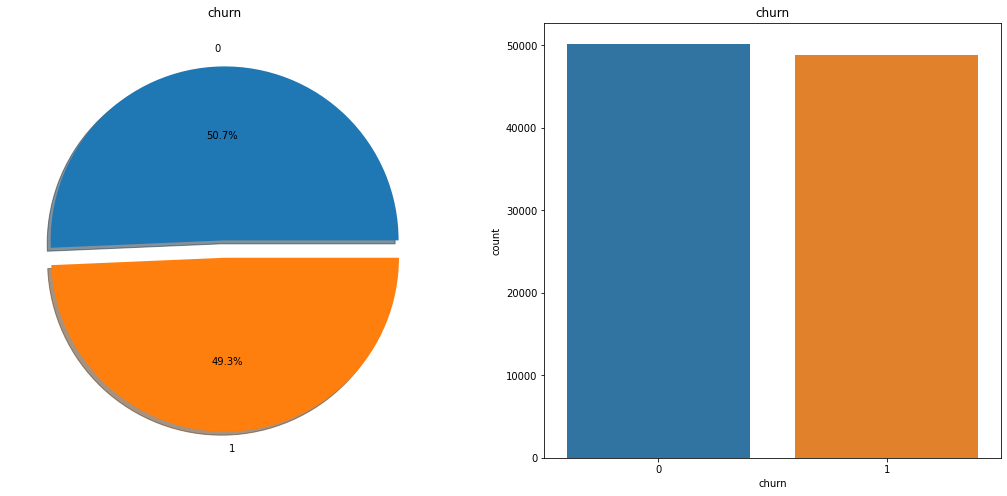

In [12]:
#非解約者と解約者の割合
x=['Non-churn','churn']
f,ax=plt.subplots(1,2,figsize=(18,8))
dfR['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=dfR,ax=ax[1])
ax[1].set_title('churn')
plt.show()

In [13]:
churndf=dfR.groupby('churn').size()

In [14]:
churndf

churn
0    50225
1    48884
dtype: int64

In [15]:
dfR.groupby(["churn"])['rev_Mean'].mean()

churn
0    59.265968
1    58.290816
Name: rev_Mean, dtype: float64

In [16]:
dfR.columns[dfR.dtypes.values == "object"]

Index([], dtype='object')

In [17]:
dfC.columns[dfC.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [18]:
categ_nominal = ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

In [19]:
for i in categ_nominal:
    dfC = pd.concat([dfC, pd.get_dummies(dfC[i], prefix=i, dummy_na=True)], sort=False, axis=1)
dfC = dfC.drop(categ_nominal, axis=1)
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 203 entries, uniqsubs to creditcd_nan
dtypes: float64(21), int64(8), uint8(174)
memory usage: 38.7 MB


In [20]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [21]:
X = dfR.drop('churn',axis=1) 
y = dfR['churn'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [22]:
#チューニング前
#不均衡データの評価はAUC　均衡データの場合は何で行う？
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 1000,            
        'learning_rate':0.03,
        'num_boost_round':1000,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid )
y_pred_max = np.argmax(y_pred)

# Accuracy の計算
accuracy = sum(y_valid == y_pred_max) / len(y_valid)
print('accuracy:', accuracy)

# feature importance表を作成
importance = pd.DataFrame(model.feature_importance(), index=X.columns, columns=['importance'])
display(importance)
# feature importanceを表示(gain)
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)



#importanceの正規化
#def minmax_norm(df_input):
    #return (importance - importance.min()) / ( importance.max() - importance.min())

#df_minmax_norm = minmax_norm(importance)
#df_minmax_norm



/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.614932
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.615651
[3]	valid_0's auc: 0.615578
[4]	valid_0's auc: 0.616372
[5]	valid_0's auc: 0.617978
[6]	valid_0's auc: 0.62096
[7]	valid_0's auc: 0.621278
[8]	valid_0's auc: 0.621632
[9]	valid_0's auc: 0.621588
[10]	valid_0's auc: 0.623625
[11]	valid_0's auc: 0.625229
[12]	valid_0's auc: 0.625989
[13]	valid_0's auc: 0.626256
[14]	valid_0's auc: 0.626751
[15]	valid_0's auc: 0.628218
[16]	valid_0's auc: 0.628974
[17]	valid_0's auc: 0.628989
[18]	valid_0's auc: 0.629338
[19]	valid_0's auc: 0.630171
[20]	valid_0's auc: 0.630771
[21]	valid_0's auc: 0.631739
[22]	valid_0's auc: 0.63193
[23]	valid_0's auc: 0.633211
[24]	valid_0's auc: 0.633971
[25]	valid_0's auc: 0.634011
[26]	valid_0's auc: 0.634426
[27]	valid_0's auc: 0.634789
[28]	valid_0's auc: 0.635302
[29]	valid_0's auc: 0.635858
[30]	valid_0's auc: 0.636354
[31]	valid_0's auc: 0.63663
[32]	valid_0's auc: 0.637237
[33]	valid_0's auc: 0.

,importance
rev_Mean,481
mou_Mean,723
totmrc_Mean,923
da_Mean,175
ovrmou_Mean,184
ovrrev_Mean,112
vceovr_Mean,206
datovr_Mean,136
roam_Mean,248
change_mou,888


,importance
months,49412.850904
change_mou,19333.462178
totmrc_Mean,18131.246407
mou_Mean,17333.951401
change_rev,8641.703438
rev_Mean,6427.452155
drop_vce_Mean,3519.635323
vceovr_Mean,3389.648836
mou_cvce_Mean,3364.927810
mou_opkv_Mean,3329.468028


In [23]:
#importanceのパーセンテージ
W=importance/importance.sum()
W

,importance
months,0.265940
change_mou,0.104053
totmrc_Mean,0.097582
mou_Mean,0.093291
change_rev,0.046510
rev_Mean,0.034593
drop_vce_Mean,0.018943
vceovr_Mean,0.018243
mou_cvce_Mean,0.018110
mou_opkv_Mean,0.017919


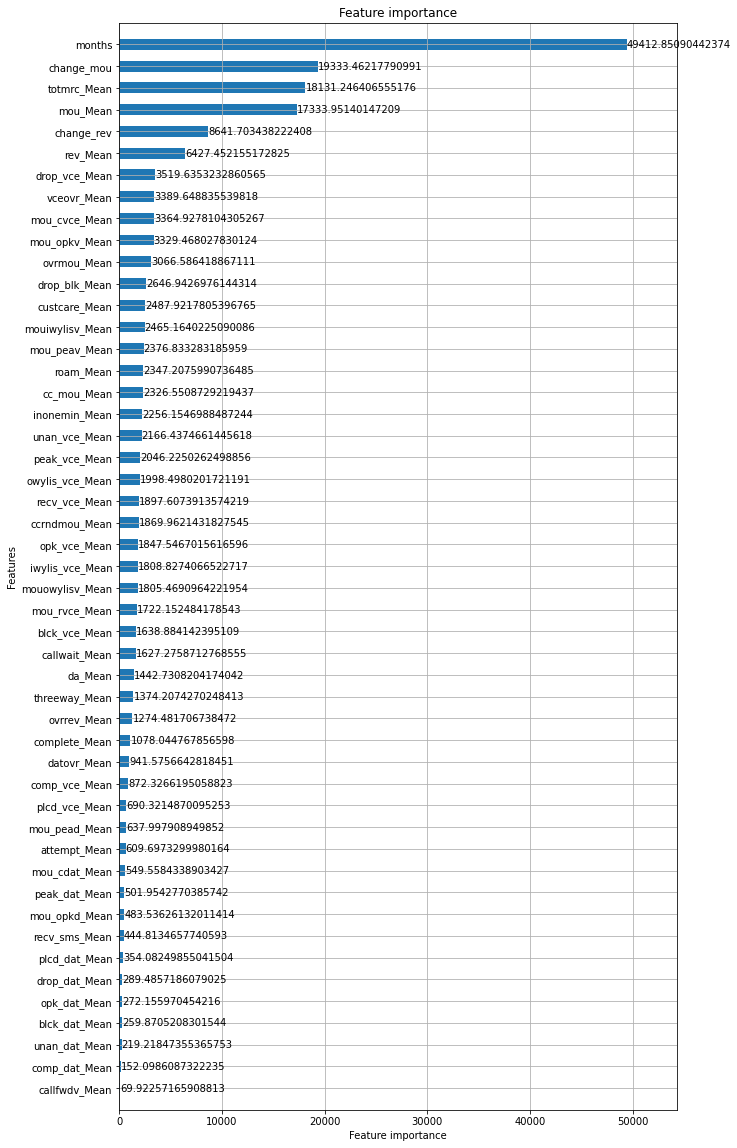

In [24]:
lgb.plot_importance(model, importance_type="gain",max_num_features=50,height=0.5, figsize=(10,20))


In [25]:
# 特徴量のカラム名を取得
f_name = model.feature_name()
# 特徴量の値を正規化
f_imp = model.feature_importance( importance_type='gain' )
f_imp = f_imp / np.sum( f_imp )
display(f_imp)

# dfを作成
df_imp = pd.DataFrame( {'feature':f_name, 'importance':f_imp} )
df_imp = df_imp.sort_values( 'importance', ascending=False )

# インデックスを振り直す
df_imp = df_imp.reset_index()

display( df_imp )

array([0.03459252, 0.09329126, 0.09758229, 0.00776477, 0.01650436,
       0.00685926, 0.01824308, 0.00506756, 0.01263266, 0.10405261,
       0.04650961, 0.01894266, 0.00155801, 0.00882047, 0.00139862,
       0.01165976, 0.00117983, 0.00371531, 0.00190567, 0.01021292,
       0.00239398, 0.00469486, 0.00081859, 0.01338998, 0.01006413,
       0.01252149, 0.01214262, 0.00739598, 0.01811003, 0.00295772,
       0.00926862, 0.01075591, 0.00971703, 0.0097351 , 0.0132675 ,
       0.01101277, 0.00270152, 0.01279211, 0.0034337 , 0.00994349,
       0.00146474, 0.01791918, 0.00260239, 0.01424583, 0.00328139,
       0.00580203, 0.00037632, 0.00875799, 0.26593976])

,index,feature,importance
0,48,months,0.265940
1,9,change_mou,0.104053
2,2,totmrc_Mean,0.097582
3,1,mou_Mean,0.093291
4,10,change_rev,0.046510
5,0,rev_Mean,0.034593
6,11,drop_vce_Mean,0.018943
7,6,vceovr_Mean,0.018243
8,28,mou_cvce_Mean,0.018110
9,41,mou_opkv_Mean,0.017919


In [26]:
# 欠損が多い行を落とす
dfR=dfR.dropna()
#重要度の高いとした18列+churnのデータを抽出
dfRS=dfR.loc[:, ["months", "change_mou","totmrc_Mean","mou_Mean","change_rev","rev_Mean","mou_cvce_Mean","vceovr_Mean","ovrmou_Mean",
                "drop_vce_Mean","mou_opkv_Mean","mouiwylisv_Mean","drop_blk_Mean","custcare_Mean","mou_peav_Mean","cc_mou_Mean",
"roam_Mean","inonemin_Mean","churn"]]

df_corr = dfRS.corr()
display(df_corr)
print(type(df_corr))

,months,change_mou,totmrc_Mean,mou_Mean,change_rev,rev_Mean,mou_cvce_Mean,vceovr_Mean,ovrmou_Mean,drop_vce_Mean,mou_opkv_Mean,mouiwylisv_Mean,drop_blk_Mean,custcare_Mean,mou_peav_Mean,cc_mou_Mean,roam_Mean,inonemin_Mean,churn
months,1.000000,0.001472,-0.052777,-0.081576,-0.006345,-0.008567,-0.069686,-0.030407,-0.006138,-0.049646,-0.129346,-0.036718,-0.083815,-0.098880,0.033581,-0.080936,-0.007212,-0.012186,0.021398
change_mou,0.001472,1.000000,-0.020845,-0.008211,0.673922,0.075835,-0.083273,0.002742,-0.011172,-0.075209,-0.073610,-0.049151,-0.071036,-0.029808,-0.095752,-0.031411,0.257873,-0.077347,-0.031536
totmrc_Mean,-0.052777,-0.020845,1.000000,0.576079,-0.022506,0.602823,0.490081,0.162897,0.200706,0.350311,0.355194,0.292164,0.331052,0.143352,0.592195,0.188660,0.046862,0.339766,-0.066085
mou_Mean,-0.081576,-0.008211,0.576079,1.000000,0.019209,0.706173,0.862206,0.539241,0.575180,0.593909,0.816336,0.550879,0.570469,0.348547,0.811161,0.379304,0.125406,0.583140,-0.057027
change_rev,-0.006345,0.673922,-0.022506,0.019209,1.000000,0.150753,-0.045282,0.016426,-0.004383,-0.029491,-0.030948,-0.024807,-0.035903,-0.023587,-0.064139,-0.041331,0.456629,-0.039859,0.007832
rev_Mean,-0.008567,0.075835,0.602823,0.706173,0.150753,1.000000,0.563573,0.772546,0.772501,0.422712,0.433678,0.342040,0.403623,0.165147,0.676579,0.242178,0.375091,0.401715,-0.010538
mou_cvce_Mean,-0.069686,-0.083273,0.490081,0.862206,-0.045282,0.563573,1.000000,0.447553,0.473964,0.537257,0.873602,0.462149,0.527143,0.385244,0.802756,0.422476,0.040230,0.407551,-0.050956
vceovr_Mean,-0.030407,0.002742,0.162897,0.539241,0.016426,0.772546,0.447553,1.000000,0.953091,0.327932,0.379762,0.283648,0.314844,0.130915,0.513092,0.190460,0.037026,0.316275,0.023990
ovrmou_Mean,-0.006138,-0.011172,0.200706,0.575180,-0.004383,0.772501,0.473964,0.953091,1.000000,0.342387,0.380551,0.307880,0.329442,0.123226,0.571145,0.181007,0.040459,0.339764,0.019433
drop_vce_Mean,-0.049646,-0.075209,0.350311,0.593909,-0.029491,0.422712,0.537257,0.327932,0.342387,1.000000,0.498119,0.336886,0.719281,0.270198,0.520935,0.277339,0.046663,0.533640,-0.014452


<class 'pandas.core.frame.DataFrame'>


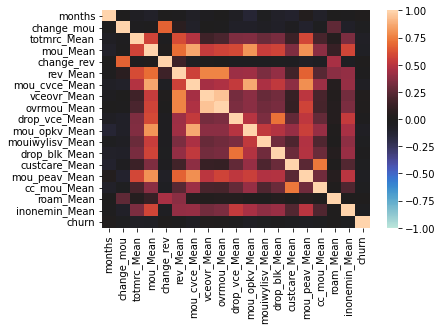

In [27]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)


モデルの学習に当たって重要と判断された特徴量について可視化することができました。重要と判断された特徴量に関していくつか検討してみることにします。それぞれの特徴量に関して、平均値や中央値、データの分布を確認し、債務不履行の有無でウィルコクソンの順位和検定を有意水準を5%として検定し、2群の中央値に有意差があるか検討してみます。


まずはchange_mouに関して検討します。

churn
0    18.578198
1    18.989915
Name: months, dtype: float64

churn
0    16.0
1    17.0
Name: months, dtype: float64

churn
0    61
1    61
Name: months, dtype: int64

churn
0    6
1    6
Name: months, dtype: int64

churn
0    9.917413
1    9.298759
Name: months, dtype: float64

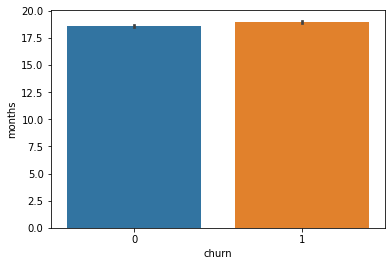

In [28]:
#総契約月数
R_Mean=dfR.groupby(["churn"])["months"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["months"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["months"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["months"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["months"].std()
display(R_std)
sns.barplot(x='churn', y='months', data=dfR, estimator=np.mean)

churn
0    -5.344265
1   -22.759003
Name: change_mou, dtype: float64

churn
0    -3.0
1   -10.0
Name: change_mou, dtype: float64

churn
0     4480.00
1    31219.25
Name: change_mou, dtype: float64

churn
0   -3875.00
1   -3041.25
Name: change_mou, dtype: float64

churn
0    250.239558
1    300.083099
Name: change_mou, dtype: float64

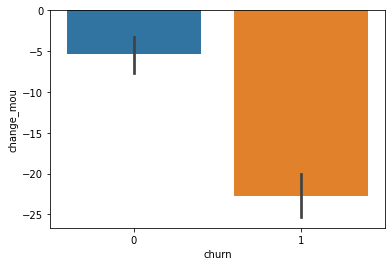

In [296]:
#3ヶ月平均比較月間使用分数の変化率
R_Mean=dfR.groupby(["churn"])["change_mou"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["change_mou"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["change_mou"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["change_mou"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["change_mou"].std()
display(R_std)
sns.barplot(x='churn', y='change_mou', data=dfR, estimator=np.mean)

churn
0    47.782378
1    44.543091
Name: totmrc_Mean, dtype: float64

churn
0    44.9900
1    43.4175
Name: totmrc_Mean, dtype: float64

churn
0    399.99
1    409.99
Name: totmrc_Mean, dtype: float64

churn
0    -8.710
1   -26.915
Name: totmrc_Mean, dtype: float64

churn
0    24.263099
1    22.836931
Name: totmrc_Mean, dtype: float64

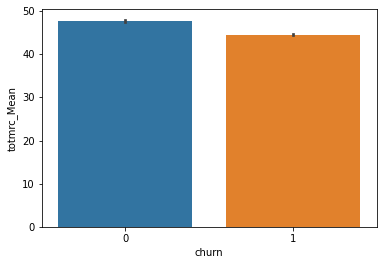

In [300]:
#毎月の料金の平均合計 利用料金がマイナスじゃない？
R_Mean=dfR.groupby(["churn"])["totmrc_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["totmrc_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["totmrc_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["totmrc_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["totmrc_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='totmrc_Mean', data=dfR, estimator=np.mean)

churn
0    543.925579
1    484.005955
Name: mou_Mean, dtype: float64

churn
0    381.00
1    330.75
Name: mou_Mean, dtype: float64

churn
0     7667.75
1    12206.75
Name: mou_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mou_Mean, dtype: float64

churn
0    540.483129
1    507.472018
Name: mou_Mean, dtype: float64

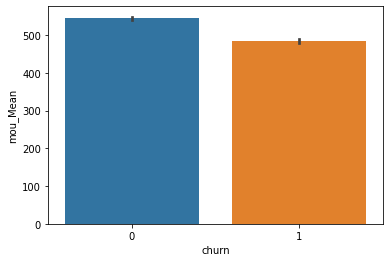

In [318]:
#月間平均使用分数
R_Mean=dfR.groupby(["churn"])["mou_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mou_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mou_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mou_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mou_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mou_Mean', data=dfR, estimator=np.mean)

churn
0   -1.410195
1   -0.621263
Name: change_rev, dtype: float64

churn
0   -0.2925
1   -0.3150
Name: change_rev, dtype: float64

churn
0    1346.9750
1    9963.6575
Name: change_rev, dtype: float64

churn
0   -1107.740
1    -851.105
Name: change_rev, dtype: float64

churn
0    35.996984
1    61.732442
Name: change_rev, dtype: float64

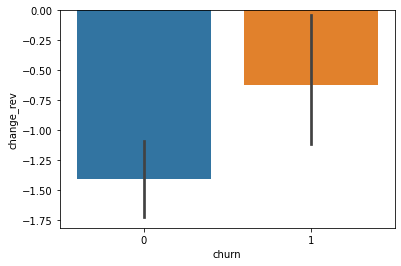

In [324]:
#3ヶ月の平均比較月間収益変化率
R_Mean=dfR.groupby(["churn"])["change_rev"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["change_rev"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["change_rev"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["change_rev"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["change_rev"].std()
display(R_std)
sns.barplot(x='churn', y='change_rev', data=dfR, estimator=np.mean)

churn
0    59.265968
1    58.290816
Name: rev_Mean, dtype: float64

churn
0    48.92250
1    47.62875
Name: rev_Mean, dtype: float64

churn
0    1223.3800
1    3843.2625
Name: rev_Mean, dtype: float64

churn
0   -6.1675
1    0.0000
Name: rev_Mean, dtype: float64

churn
0    44.375855
1    48.119450
Name: rev_Mean, dtype: float64

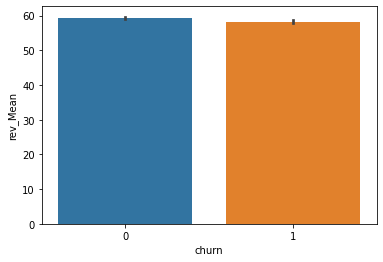

In [325]:
#平均月収
R_Mean=dfR.groupby(["churn"])["rev_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["rev_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["rev_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["rev_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["rev_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='rev_Mean', data=dfR, estimator=np.mean)

churn
0    241.940888
1    214.978030
Name: mou_cvce_Mean, dtype: float64

churn
0    160.390
1    133.975
Name: mou_cvce_Mean, dtype: float64

churn
0    4514.453333
1    3987.526667
Name: mou_cvce_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mou_cvce_Mean, dtype: float64

churn
0    269.778995
1    258.355916
Name: mou_cvce_Mean, dtype: float64

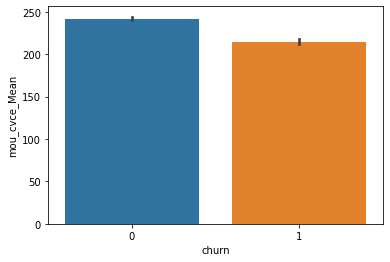

In [326]:
#音声通話の平均使用分数
R_Mean=dfR.groupby(["churn"])["mou_cvce_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mou_cvce_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mou_cvce_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mou_cvce_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mou_cvce_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mou_cvce_Mean', data=dfR, estimator=np.mean)

churn
0    12.584407
1    14.026307
Name: vceovr_Mean, dtype: float64

churn
0    0.4375
1    0.9750
Name: vceovr_Mean, dtype: float64

churn
0    896.0875
1    890.7625
Name: vceovr_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: vceovr_Mean, dtype: float64

churn
0    29.190946
1    30.890669
Name: vceovr_Mean, dtype: float64

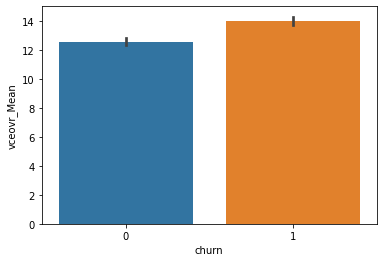

In [327]:
#音声超過の平均月収
R_Mean=dfR.groupby(["churn"])["vceovr_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["vceovr_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["vceovr_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["vceovr_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["vceovr_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='vceovr_Mean', data=dfR, estimator=np.mean)

churn
0    39.210809
1    42.992448
Name: ovrmou_Mean, dtype: float64

churn
0    2.25
1    3.50
Name: ovrmou_Mean, dtype: float64

churn
0    4320.75
1    2756.00
Name: ovrmou_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: ovrmou_Mean, dtype: float64

churn
0    97.793048
1    96.733925
Name: ovrmou_Mean, dtype: float64

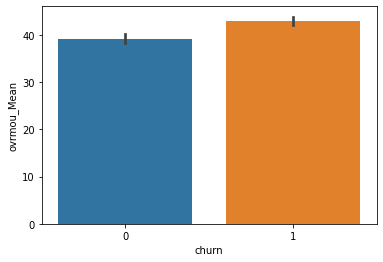

In [328]:
#平均超過使用時間
R_Mean=dfR.groupby(["churn"])["ovrmou_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["ovrmou_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["ovrmou_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["ovrmou_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["ovrmou_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='ovrmou_Mean', data=dfR, estimator=np.mean)

churn
0    6.100647
1    5.841581
Name: drop_vce_Mean, dtype: float64

churn
0    3.0
1    3.0
Name: drop_vce_Mean, dtype: float64

churn
0    221.666667
1    232.666667
Name: drop_vce_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: drop_vce_Mean, dtype: float64

churn
0    9.118052
1    8.797025
Name: drop_vce_Mean, dtype: float64

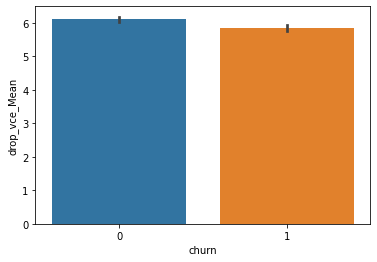

In [329]:
#切断された音声通話の平均数
R_Mean=dfR.groupby(["churn"])["drop_vce_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["drop_vce_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["drop_vce_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["drop_vce_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["drop_vce_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='drop_vce_Mean', data=dfR, estimator=np.mean)

churn
0    177.221996
1    154.406974
Name: mou_opkv_Mean, dtype: float64

churn
0    86.32
1    67.33
Name: mou_opkv_Mean, dtype: float64

churn
0    4337.893333
1    3113.866667
Name: mou_opkv_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mou_opkv_Mean, dtype: float64

churn
0    244.624486
1    229.788907
Name: mou_opkv_Mean, dtype: float64

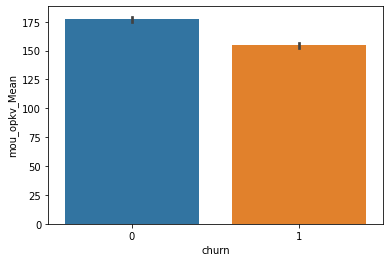

In [330]:
#切オフピーク音声通話の平均使用時間
R_Mean=dfR.groupby(["churn"])["mou_opkv_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mou_opkv_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mou_opkv_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mou_opkv_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mou_opkv_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mou_opkv_Mean', data=dfR, estimator=np.mean)

churn
0    19.683142
1    16.823865
Name: mouiwylisv_Mean, dtype: float64

churn
0    4.09
1    2.54
Name: mouiwylisv_Mean, dtype: float64

churn
0    1154.023333
1    1703.536667
Name: mouiwylisv_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mouiwylisv_Mean, dtype: float64

churn
0    42.926451
1    39.957039
Name: mouiwylisv_Mean, dtype: float64

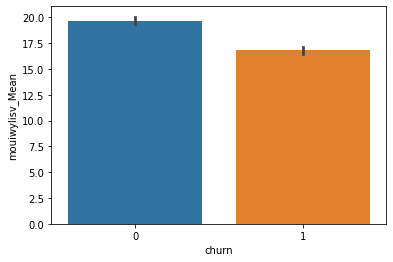

In [331]:
#切無線同士音声通話の平均使用時間
R_Mean=dfR.groupby(["churn"])["mouiwylisv_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mouiwylisv_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mouiwylisv_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mouiwylisv_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mouiwylisv_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mouiwylisv_Mean', data=dfR, estimator=np.mean)

churn
0    10.309600
1     9.852075
Name: drop_blk_Mean, dtype: float64

churn
0    5.666667
1    5.333333
Name: drop_blk_Mean, dtype: float64

churn
0    489.666667
1    420.000000
Name: drop_blk_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: drop_blk_Mean, dtype: float64

churn
0    15.647349
1    15.238718
Name: drop_blk_Mean, dtype: float64

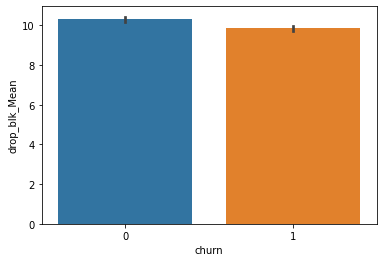

In [332]:
#切ブロックされたコール数
R_Mean=dfR.groupby(["churn"])["drop_blk_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["drop_blk_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["drop_blk_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["drop_blk_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["drop_blk_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='drop_blk_Mean', data=dfR, estimator=np.mean)

churn
0    1.988213
1    1.601414
Name: custcare_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: custcare_Mean, dtype: float64

churn
0    365.666667
1    675.333333
Name: custcare_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: custcare_Mean, dtype: float64

churn
0    5.474082
1    5.174032
Name: custcare_Mean, dtype: float64

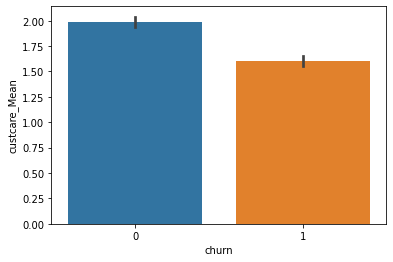

In [333]:
#カスタマーケアコールの平均
R_Mean=dfR.groupby(["churn"])["custcare_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["custcare_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["custcare_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["custcare_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["custcare_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='custcare_Mean', data=dfR, estimator=np.mean)

churn
0    184.193774
1    164.917758
Name: mou_peav_Mean, dtype: float64

churn
0    123.596667
1    107.990000
Name: mou_peav_Mean, dtype: float64

churn
0    4015.346667
1    2871.470000
Name: mou_peav_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mou_peav_Mean, dtype: float64

churn
0    215.443676
1    198.867251
Name: mou_peav_Mean, dtype: float64

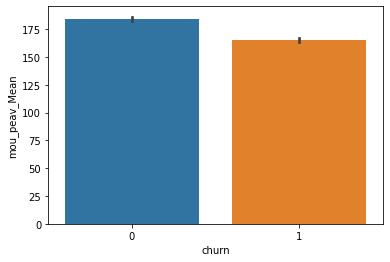

In [334]:
#ピーク時の音声通話の平均使用時間
R_Mean=dfR.groupby(["churn"])["mou_peav_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mou_peav_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mou_peav_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mou_peav_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mou_peav_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mou_peav_Mean', data=dfR, estimator=np.mean)

churn
0    4.063472
1    3.312162
Name: cc_mou_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: cc_mou_Mean, dtype: float64

churn
0    422.006667
1    602.950000
Name: cc_mou_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: cc_mou_Mean, dtype: float64

churn
0    11.128662
1     9.939843
Name: cc_mou_Mean, dtype: float64

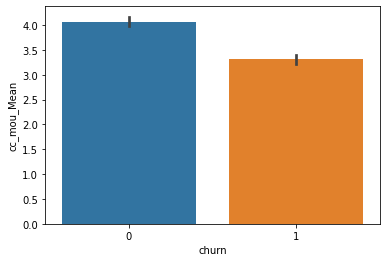

In [335]:
#カスタマーケア通話の平均使用時間
R_Mean=dfR.groupby(["churn"])["cc_mou_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["cc_mou_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["cc_mou_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["cc_mou_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["cc_mou_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='cc_mou_Mean', data=dfR, estimator=np.mean)

churn
0    1.152121
1    1.422429
Name: roam_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: roam_Mean, dtype: float64

churn
0    1112.4475
1    3685.2000
Name: roam_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: roam_Mean, dtype: float64

churn
0     8.603996
1    19.065171
Name: roam_Mean, dtype: float64

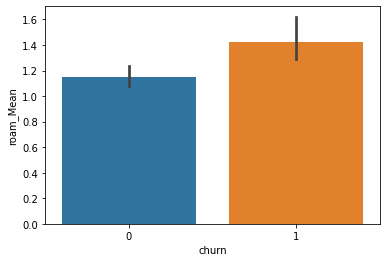

In [336]:
#ローミングコール平均
R_Mean=dfR.groupby(["churn"])["roam_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["roam_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["roam_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["roam_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["roam_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='roam_Mean', data=dfR, estimator=np.mean)

churn
0    31.724772
1    27.926152
Name: inonemin_Mean, dtype: float64

churn
0    13.333333
1    11.666667
Name: inonemin_Mean, dtype: float64

churn
0    3086.666667
1    1576.666667
Name: inonemin_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: inonemin_Mean, dtype: float64

churn
0    60.503902
1    50.650024
Name: inonemin_Mean, dtype: float64

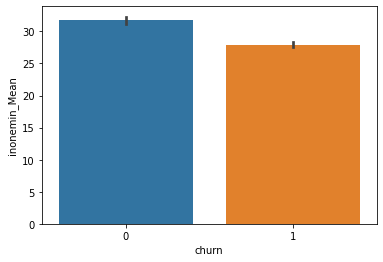

In [337]:
#1分以内のインバウンドコール
R_Mean=dfR.groupby(["churn"])["inonemin_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["inonemin_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["inonemin_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["inonemin_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["inonemin_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='inonemin_Mean', data=dfR, estimator=np.mean)

churn
0    30.231338
1    26.847358
Name: mouowylisv_Mean, dtype: float64

churn
0    13.133333
1    11.043333
Name: mouowylisv_Mean, dtype: float64

churn
0    1490.253333
1    1802.706667
Name: mouowylisv_Mean, dtype: float64

churn
0    0.0
1    0.0
Name: mouowylisv_Mean, dtype: float64

churn
0    50.594879
1    47.147902
Name: mouowylisv_Mean, dtype: float64

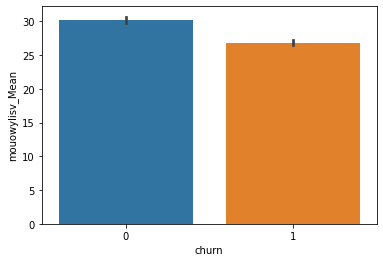

In [29]:
#アウトバウンドコール
R_Mean=dfR.groupby(["churn"])["mouowylisv_Mean"].mean()
display(R_Mean)
R_Medien=dfR.groupby(["churn"])["mouowylisv_Mean"].median()
display(R_Medien)
R_Max=dfR.groupby(["churn"])["mouowylisv_Mean"].max()
display(R_Max)
R_min=dfR.groupby(["churn"])["mouowylisv_Mean"].min()
display(R_min)
R_std=dfR.groupby(["churn"])["mouowylisv_Mean"].std()
display(R_std)
sns.barplot(x='churn', y='mouowylisv_Mean', data=dfR, estimator=np.mean)

In [123]:
dfR.groupby(["churn"])["change_mou"].median()

churn
0    -3.0
1   -10.0
Name: change_mou, dtype: float64

実際に解約の有無によるchange_mouの中央値やヒストグラムを可視化してみましょう。

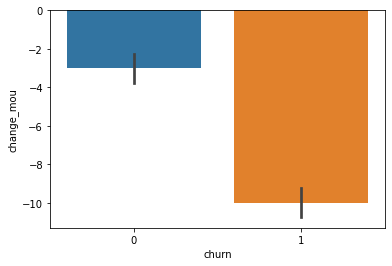

In [124]:
sns.barplot(x='churn', y='change_mou', data=dfR, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_mou, dtype: object

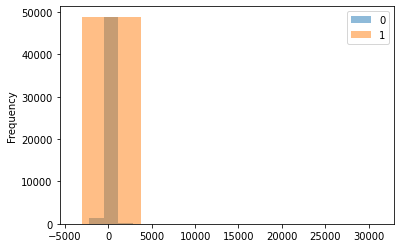

In [125]:
dfR.groupby('churn')['change_mou'].plot.hist(bins=5, alpha=0.5, legend=True)

ウィルコクソンの順位和検定を有意水準を5%として検定し、2群の中央値に有意差があるか検討してみます。

In [126]:
from scipy import stats
s, pvalue  = stats.mannwhitneyu(dfR[dfR["churn"]==1]["change_mou"]
                , dfR[dfR["churn"]==0]["change_mou"]
                ,alternative='two-sided')
pvalue < 0.05

ValueError: ignored

この検定より、解約の有無に関してchange_mouには有意差があり、カラム名から察するに過去 3 か月の平均と比較した月間使用時間 (分) の変化率が低いと解約しすることがわかった。使用時間を上げると金額が安くなるなど、月間使用時間の上昇を上げるアイデアもあり。


In [98]:
#毎月の定期的な料金の平均合計と解約について
dfR.groupby(["churn"])["totmrc_Mean"].mean()

churn
0    47.782378
1    44.543091
Name: totmrc_Mean, dtype: float64

In [99]:
dfR.groupby(["churn"])["totmrc_Mean"].median()

churn
0    44.9900
1    43.4175
Name: totmrc_Mean, dtype: float64

実際に解約の有無によるtotmrc_Meanの中央値やヒストグラムを可視化してみましょう。

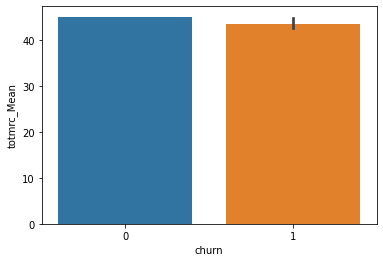

In [100]:
sns.barplot(x='churn', y='totmrc_Mean', data=dfR, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: totmrc_Mean, dtype: object

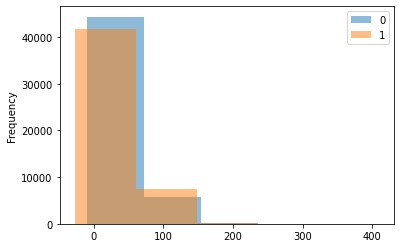

In [101]:
dfR.groupby('churn')['totmrc_Mean'].plot.hist(bins=5, alpha=0.5, legend=True)

In [102]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(dfR[dfR["churn"]==1]["totmrc_Mean"]
                , dfR[dfR["churn"]==0]["totmrc_Mean"]
                ,alternative='two-sided')
pvalue < 0.05

ValueError: ignored

この検定より、解約の有無に関して毎月の定期的な料金の平均合計には有意差がある


In [45]:
#Clientデータについても分析してみる　ここは銃回帰分析かな？
#データの方の変換
print('データ型の確認（型変換前）\n{}\n'.format(dfC.dtypes))

データ型の確認（型変換前）
uniqsubs          int64
actvsubs          int64
totcalls          int64
totmou          float64
totrev          float64
                 ...   
kid16_17_Y        uint8
kid16_17_nan      uint8
creditcd_N        uint8
creditcd_Y        uint8
creditcd_nan      uint8
Length: 203, dtype: object



In [44]:
#統計量をまとめて計算
dfC.describe()

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,kid6_10_nan,kid11_15_U,kid11_15_Y,kid11_15_nan,kid16_17_U,kid16_17_Y,kid16_17_nan,creditcd_N,creditcd_Y,creditcd_nan
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111528,7546.314699,2836.366920,57.913832,483.726493,...,0.017320,0.894540,0.08814,0.017320,0.883040,0.099640,0.017320,0.310340,0.672340,0.017320
std,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,...,0.130461,0.307147,0.28350,0.130461,0.321374,0.299521,0.130461,0.462635,0.469362,0.130461
min,1.000000,0.000000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,889.000000,2529.000000,518.980000,452.180000,2474.000000,868.000000,35.370000,176.140000,...,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1822.000000,5191.500000,804.530000,737.760000,5102.500000,1789.000000,49.890000,360.190000,...,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,3492.000000,9776.000000,1263.767500,1188.175000,9661.000000,3442.000000,69.480000,655.670000,...,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,196.000000,53.000000,98874.000000,233419.096700,27321.500000,27071.300000,232855.100000,98705.000000,924.270000,7040.130000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
